# Primeira lista de álgebra linear aplicada
Fábio Bocampagni

# Configuração do ambiente

In [70]:
import Pkg; Pkg.add("Colors")
import Pkg; Pkg.add("ColorVectorSpace")
import Pkg; Pkg.add("Images")
import Pkg; Pkg.add("ImageShow")
import Pkg; Pkg.add("FileIO")
import Pkg; Pkg.add("ImageIO")
import Pkg; Pkg.add("HypertextLiteral")
using Images
begin
    using Colors, ColorVectorSpace, ImageShow, FileIO, ImageIO
    using HypertextLiteral
end
url = "https://user-images.githubusercontent.com/6933510/107239146-dcc3fd00-6a28-11eb-8c7b-41aaf6618935.png"

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


"https://user-images.githubusercontent.com/6933510/107239146-dcc3fd00-6a28-11eb-8c7b-41aaf6618935.png"

## Download da imagem do cachorro do 3blue1brown.

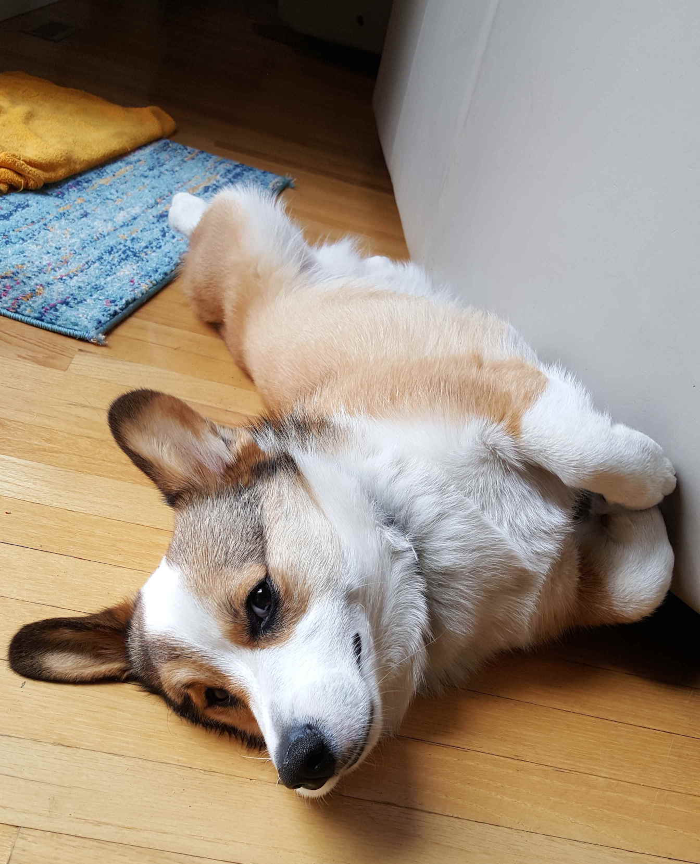

In [82]:
philip_filename = download(url) # download to a local file. The filename is returned
philip = load(philip_filename)

# Função de inversão

Para inverter a imagem, basta percorrer o array 2d de trás para frente e preencher, na ordem ordinária, a variável matrix_base.

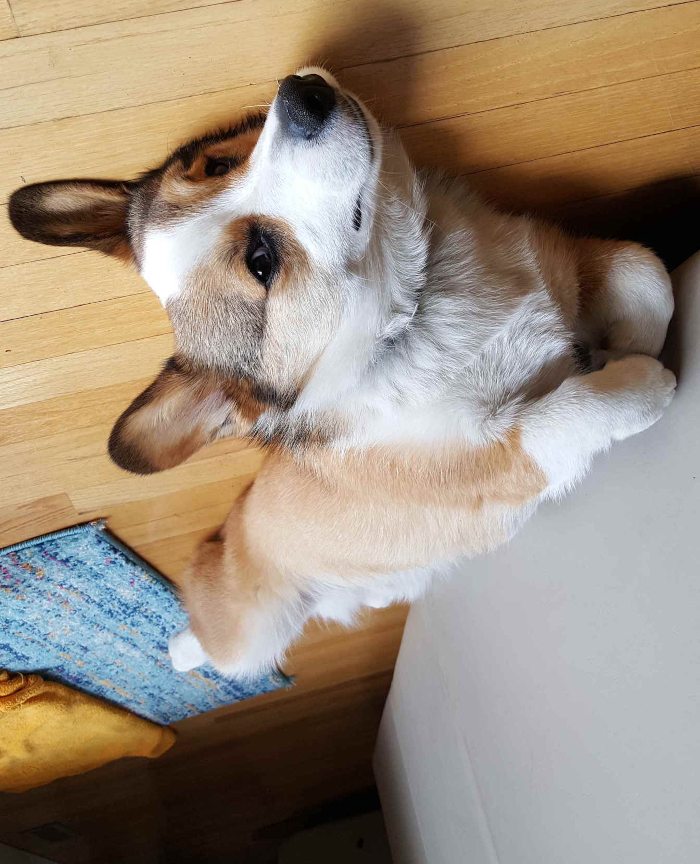

In [83]:
function reverse(image)
    matrix_base = copy(image)
    for i=size(image, 1):-1:1
        for j=1:size(image, 2)
            matrix_base[size(image, 1)-i+1,j] = image[i,j]
        end
    end
    return matrix_base
end

reverse(philip)

# Nova imagem

Busquei fazer uma mistura de cores, rotações e inversões. Tentei implementar na mão a transformação linear de rotação, porém, não deu muito certo. Dessa forma, utilizei a built-in da linguagem.

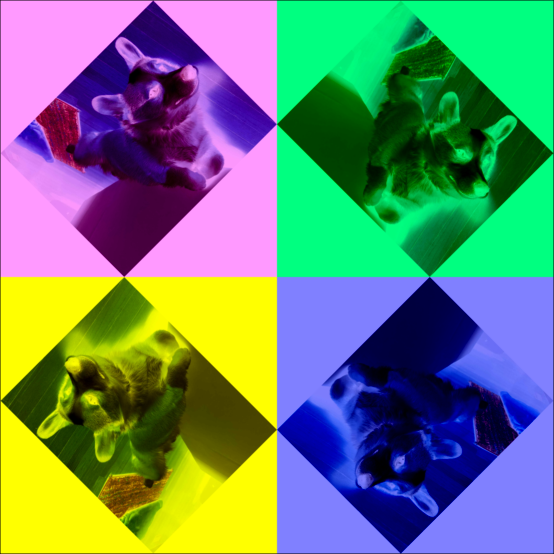

In [84]:
roxo = RGB(1, 0.6, 1)
azul_claro = RGB(0.5, 0.5, 1.0)
amarelo = RGB(1.0, 1.0, 0.0)
verde_claro = RGB(0.0, 1.0, 0.5)

function gira_com_angulacao(image, angle_degrees)
    angle_radians = angle_degrees * pi / 180

    rotated_image = imrotate(image, angle_radians)

    return rotated_image
end

function gera_imagem(imagem, valor)
    return gira_com_angulacao(reverse(imagem), valor)
end
[(roxo).-gera_imagem(philip, 45) verde_claro.-gera_imagem(philip, 135); amarelo.-gera_imagem(philip, -45) azul_claro.-gera_imagem(philip, -135)]

# Broadcasting

A função inverte pixel recebe um pixel e configura o complemento de cada componente do RGB. A função inverte_imagem aplica a inverte_pixel, por meio de broadcasting, a todos os pixels da variável imagem.

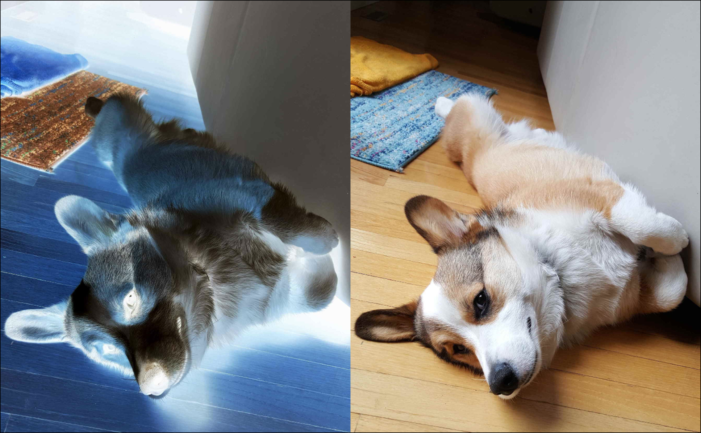

In [85]:
function inverte_pixel(pixel)
    r = 1.0 - pixel.r
    g = 1.0 - pixel.g
    b = 1.0 - pixel.b
    RGB(r, g, b)
end

function inverte_imagem(imagem)
    return inverte_pixel.(imagem)
end

inverted_img = inverte_imagem(philip)

[inverted_img philip]

# Preto e Branco

Para transformar uma imagem em pretoe branco, podemos lembrar que branco é a consonância de todas as cores e preto, a ausência delas. Dessa forma, o cinza precisa estar no meio do caminho. Com isso, aplico para cada pixel da imagem a soma das componentes do rgb de do próprio pixel. Infelizmente, perdeu-se suavização após a minha transformação linear. Acredito que algum operador de suavização, nos moldes de uma gaussiana, resolveria. Porém, me falta alicerce técnico na linguagem para desenvolver tal operador.

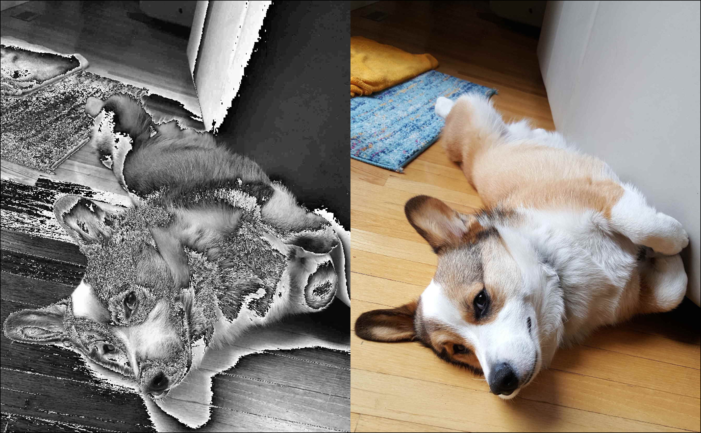

In [86]:
function preto_branco(image)
    gray_image = zeros(RGB{N0f8}, size(image))
    for i in 1:size(image)[1], j in 1:size(image)[2]
        pixel = image[i, j]
        r, g, b = red(pixel), green(pixel), blue(pixel)
        gray = (r+ g + b)
        gray_image[i, j] = RGB(gray, gray, gray)
    end
    return gray_image
end

[preto_branco(philip) philip]